### Các mốc thời gian trong ngày mà Fanpage thường xuyên đăng bài

### Số lượt tương tác trong các bài đăng thay đổi như thế nào?

### Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được thu thập?

### Sự tương quan giữa số lượng reactions với các trường khác như số lượng bình luận, độ dài bài viết?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_theme()

In [3]:
df = pd.read_csv('data/vebay69/clean/posts_full.csv')

### Tổng quan về dữ liệu 

In [4]:
df.shape

(914, 36)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        914 non-null    int64  
 1   post_text                      914 non-null    object 
 2   shared_text                    24 non-null     object 
 3   time                           914 non-null    object 
 4   image                          884 non-null    object 
 5   image_lowquality               914 non-null    object 
 6   images                         913 non-null    object 
 7   images_description             913 non-null    object 
 8   images_lowquality              914 non-null    object 
 9   images_lowquality_description  914 non-null    object 
 10  likes                          914 non-null    int64  
 11  comments                       914 non-null    int64  
 12  shares                         914 non-null    int

In [6]:
df[~df['shared_post_id'].isna()]

,post_id,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,images_lowquality_description,likes,comments,shares,link,links,user_id,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,comments_full,reactors,w3_fb_url,reaction_count,with,image_id,image_ids,fetched_time,like,love,haha,wow,care,sad,angry
167,645129864388888,Năm nay không biết đậu xanh có bị đánh bại khô...,"Vẽ bậy\nSeptember 20, 2021 at 3:57 PM ·\n\ntru...",2023-09-05 04:33:50,https://scontent-xsp1-3.xx.fbcdn.net/v/t39.308...,https://scontent-xsp1-3.xx.fbcdn.net/v/t39.308...,['https://scontent-xsp1-3.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-xsp1-3.xx.fbcdn.net/v/t39.3...,['No photo description available.'],2041,89,3,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,100066756416622,4.538354e+15,2021-09-20 15:57:00,7.729542e+14,Vẽ bậy,https://facebook.com/story.php?story_fbid=4538...,NaN,[],https://www.facebook.com/vebay69/posts/6451298...,2490,"[{'name': 'Vẽ bậy', 'link': 'https://facebook....",4.538354e+15,['4538353869618102'],2023-11-20 12:51:50.983007,2041,198,175,74,2,0,0
785,5520048371448642,Ae đậu xanh theo tui <3\n#Panda,"Vẽ bậy\nSeptember 20, 2021 at 3:57 PM ·\n\ntru...",2022-08-05 14:16:14,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],1949,1300,57,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,772954189491441,4.538354e+15,2021-09-20 15:57:00,7.729542e+14,Vẽ bậy,https://facebook.com/story.php?story_fbid=pfbi...,NaN,[],https://www.facebook.com/vebay69/posts/5520048...,10000,"[{'name': 'Vẽ bậy', 'link': 'https://facebook....",4.538354e+15,['4538353869618102'],2023-11-21 07:59:36.720286,1949,4205,2455,1354,18,16,3


### Dữ liệu các bài post được lấy trong khoảng thời gian nào ?

In [7]:
df['time'].min(), df['time'].max()

('2022-05-06 07:37:28', '2023-11-22 03:43:11')

## Đâu là bài viết có lượt tương tác lớn nhất trong bộ dữ liệu ?

### Top 5 Post có nhiều lượt reaction nhất

In [8]:
top_5_max_reaction = df.nlargest(5, 'reaction_count')
top_5_max_reaction[['post_id', 'post_text', 'reaction_count']]

,post_id,post_text,reaction_count
711,5663428510443960,Ai chắc cũng đã từng\n#Panda,37754
622,5854513741335435,Na Ế trải lòng\n#Panda,26723
644,5808693772584099,Tin chuẩn chưa bro\n#Panda,26325
662,5775707419216068,Nổ stk đê\n#Panda,24967
423,6291401437646661,Nhưng mấy anh cứ giựt giựt ấy\n#Panda,24928


In [9]:
top_5_min_reaction = df.nsmallest(5, 'reaction_count')
top_5_min_reaction[['post_id', 'post_text', 'reaction_count']]

,post_id,post_text,reaction_count
466,6238158042971001,Hy vọng mèo 2023 là mèo thần tài 😁,4
465,6238625046257634,Này để chọc mấy người 1m8 à? 😁,7
517,6150474095072730,Superhero này siuuuu :v,8
470,6233068110146661,Ôi tuổi thơ 😂,10
471,6232543603532445,Sao lại mang toàn thú cưng ra minh họa thế này? 😆,12


In [10]:
df.rename(columns={'reaction_count': 'total_react'}, inplace=True)

In [11]:
df[['total_react', 'comments', 'shares', 'like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']].describe().astype(int)

,total_react,comments,shares,like,love,haha,wow,care,sad,angry
count,914,914,914,914,914,914,914,914,914,914
mean,5036,279,72,3425,19,1505,6,5,60,0
std,4477,591,961,2854,150,1972,45,16,229,3
min,4,0,0,0,0,0,0,0,0,0
25%,1968,45,7,1303,2,322,1,1,4,0
50%,3665,99,16,2614,5,762,3,3,14,0
75%,6650,258,40,4601,10,1760,6,5,45,0
max,37754,7500,29000,21311,4205,14508,1354,333,5041,86


In [12]:
df_sorted = df.sort_values('time')
df_sorted.head()

,post_id,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,images_lowquality_description,likes,comments,shares,link,links,user_id,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,w3_fb_url,total_react,with,image_id,image_ids,fetched_time,like,love,haha,wow,care,sad,angry
909,5262746583845490,Ông con Enh Guốc :)\n#Panda,NaN,2022-05-06 07:37:28,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],1735,49,12,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/5262746...,2921,NaN,5.262745e+15,['5262745410512274'],2023-11-21 08:29:09.776214,1735,5,1146,1,1,33,0
908,5263709253749223,Aizz chán ba ghê ớ..\n#Lìquầnxòi,NaN,2022-05-06 15:11:37,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,['No photo description available.'],1028,16,2,NaN,[{'link': '/hashtag/lìquầnxòi?_ft_=encrypted_t...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/5263709...,1527,NaN,5.263708e+15,['5263708363749312'],2023-11-21 08:29:00.486643,1028,2,490,1,0,6,0
907,5266711463449002,Nhìn bạn cũng C.h.i.ế.n đấy :)\n#panda,NaN,2022-05-07 15:36:30,https://scontent-sin6-3.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-3.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-3.xx.fbcdn.net/v/t39.3...,"[""Có thể là hình minh họa về văn bản cho biết ...",['https://scontent-sin6-3.xx.fbcdn.net/v/t39.3...,"[""Có thể là hình minh họa về văn bản cho biết ...",1142,75,22,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/5266711...,2372,NaN,5.266711e+15,['5266710616782420'],2023-11-21 08:28:49.211488,1142,4,1210,1,0,15,0
906,5269137123206436,Happy mother's day <3\n#Lìquầnxòi,NaN,2022-05-08 11:52:42,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],758,23,9,NaN,[{'link': '/hashtag/lìquầnxòi?_ft_=encrypted_t...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/5269137...,1391,NaN,5.269136e+15,['5269135959873219'],2023-11-21 08:28:37.570599,758,13,612,0,2,6,0
905,5271002853019863,Chính tôi :)\n#Panda,NaN,2022-05-09 04:02:31,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,['No photo description available.'],869,81,30,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/5271002...,1539,NaN,5.271003e+15,['5271002636353218'],2023-11-21 08:28:30.041904,869,3,646,0,0,20,1


<Axes: title={'center': 'Total Reaction'}, xlabel='time'>

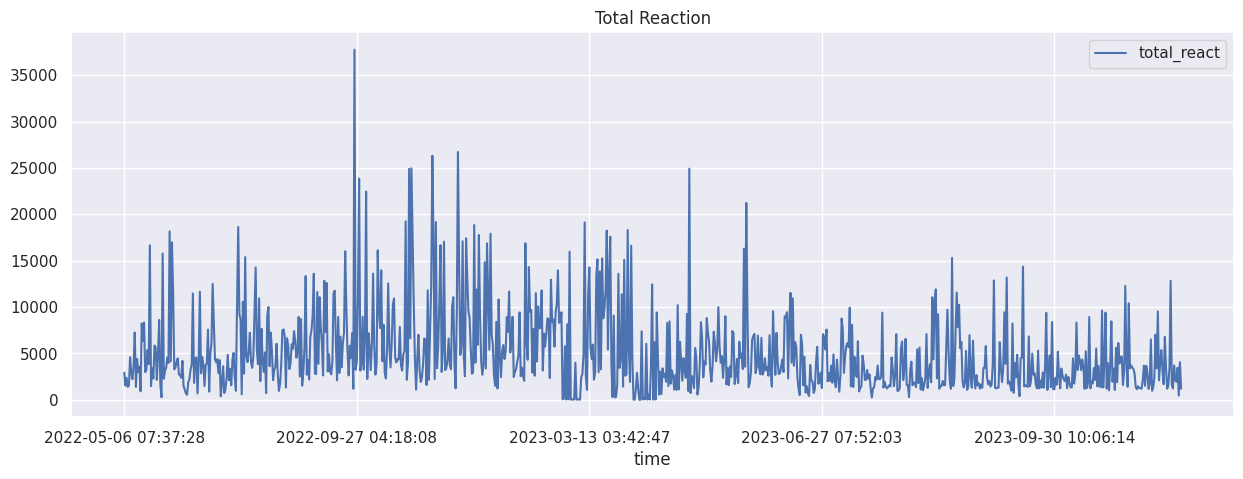

In [13]:
df_sorted.plot(x='time', y='total_react', kind='line', figsize=(15, 5), title='Total Reaction');

<Axes: title={'center': 'Number of like'}, xlabel='time'>

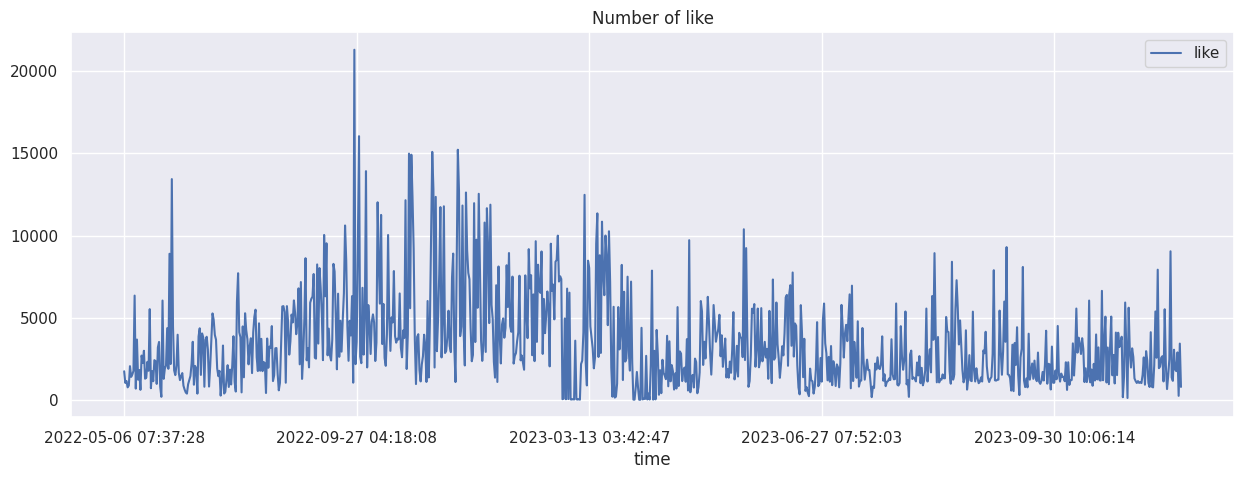

In [14]:
df_sorted.plot(x='time', y='like', kind='line', figsize=(15, 5), title='Number of like');

<Axes: title={'center': 'Number of haha'}, xlabel='time'>

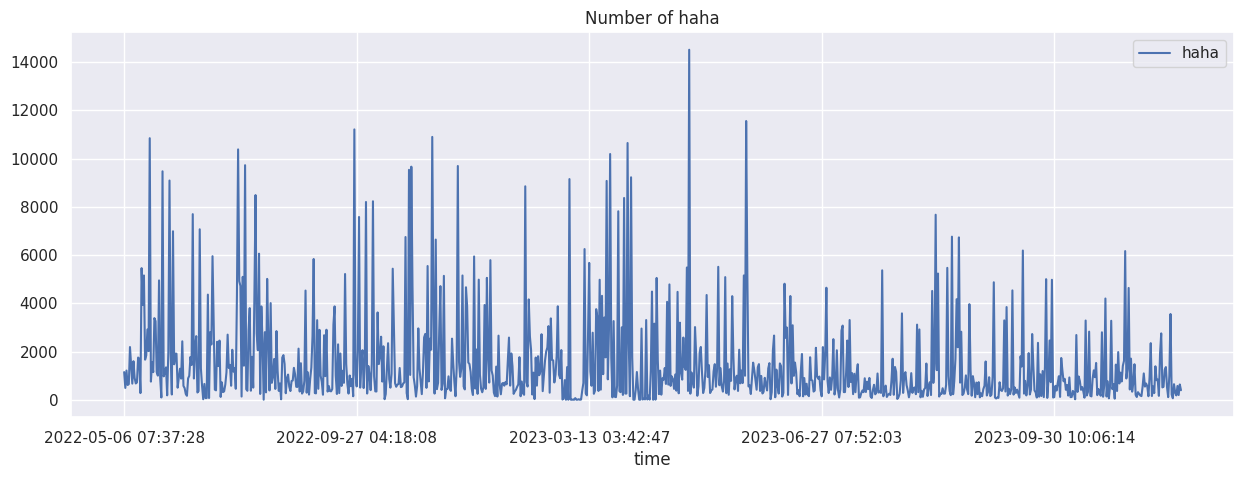

In [15]:
df_sorted.plot(x='time', y='haha', kind='line', figsize=(15, 5), title='Number of haha');

<Axes: title={'center': 'Number of angry'}, xlabel='time'>

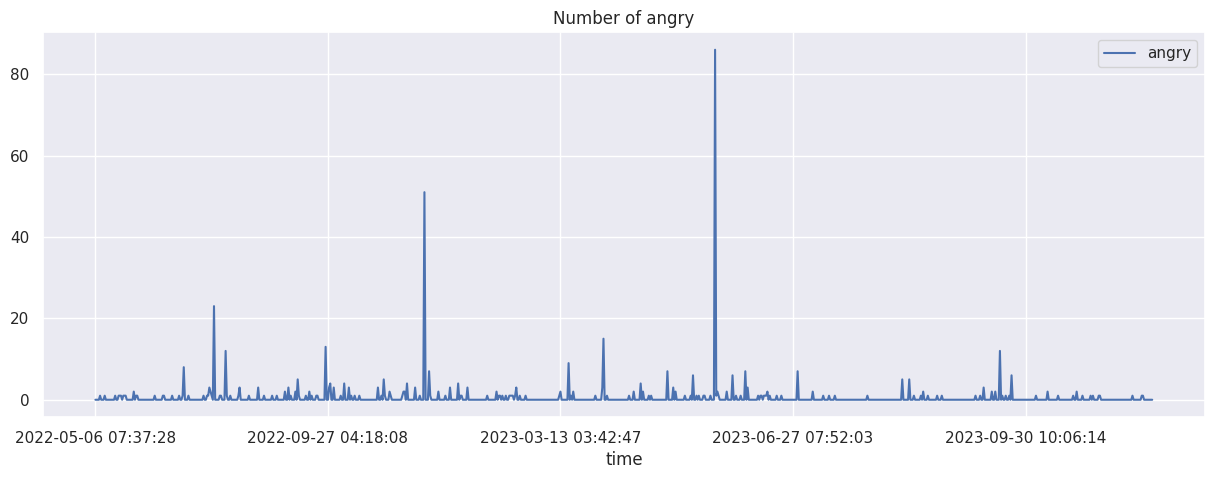

In [16]:
df_sorted.plot(x='time', y='angry', kind='line', figsize=(15, 5), title='Number of angry');

<Axes: xlabel='total_react', ylabel='comments'>

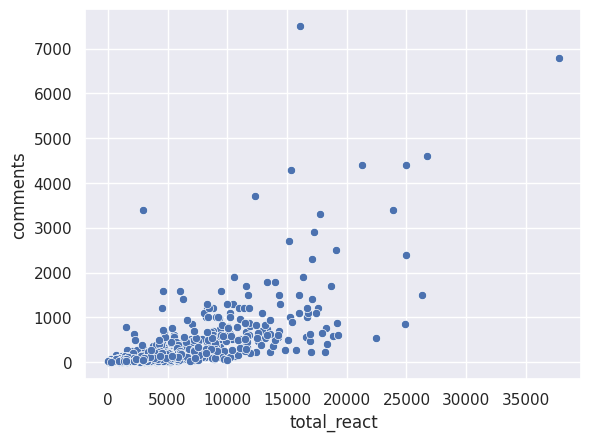

In [17]:
sns.scatterplot(data=df, x='total_react', y='comments');

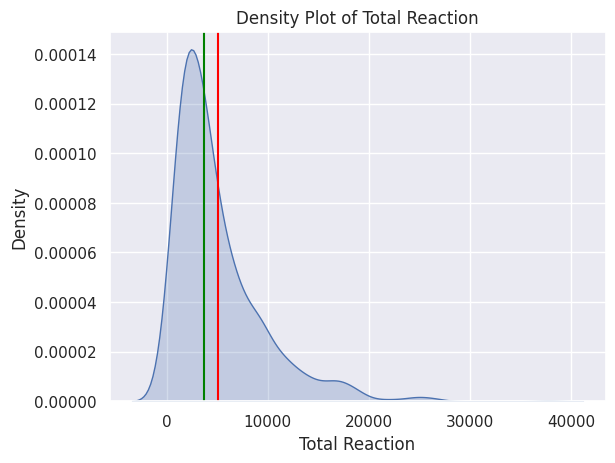

In [18]:
sns.kdeplot(data=df['total_react'], fill=True)
plt.axvline(df['total_react'].mean(), color='red')
plt.axvline(df['total_react'].median(), color='green')
plt.xlabel('Total Reaction')
plt.ylabel('Density')
plt.title('Density Plot of Total Reaction');

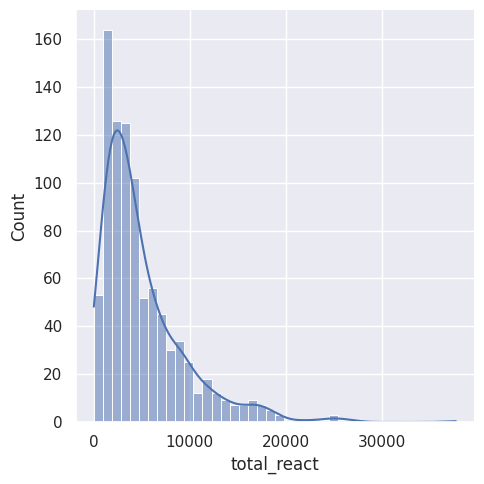

In [19]:
sns.displot(data=df, x='total_react', kde=True);

In [20]:
df.head()

,post_id,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,images_lowquality_description,likes,comments,shares,link,links,user_id,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,w3_fb_url,total_react,with,image_id,image_ids,fetched_time,like,love,haha,wow,care,sad,angry
0,685638947004646,Mùa đông chưa vậy\n#Panda,NaN,2023-11-20 05:28:02,NaN,https://scontent-sin6-1.xx.fbcdn.net/v/t39.308...,[],[],['https://scontent-sin6-1.xx.fbcdn.net/v/t39.3...,"[""May be an image of text that says 'Lạnh quá ...",783,24,10,NaN,[{'link': '/hashtag/panda?refid=17&_ft_=encryp...,100066756416622,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/6856389...,1193,NaN,6.856387e+14,['685638737004667'],2023-11-20 08:04:44.252150,783,6,396,3,3,2,0
1,685577330344141,"Con chịu rồi, cái này con không học được\n#Vui...",NaN,2023-11-20 04:00:02,NaN,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,[],[],['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,"[""May be pop art of text that says 'Học tập an...",3421,43,0,NaN,[{'link': '/hashtag/vuilavietlott?refid=17&_ft...,100066756416622,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/6855773...,4054,NaN,6.855767e+14,['685576747010866'],2023-11-20 08:04:46.677532,3421,0,632,0,0,1,0
2,685111467057394,Bạn tồiiiiiiiiii\n#Muonggg,NaN,2023-11-19 08:54:12,https://m.facebook.com/photo/view_full_size/?f...,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,['https://m.facebook.com/photo/view_full_size/...,['May be a doodle of text'],['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,['May be a doodle of text'],241,31,7,NaN,[{'link': '/hashtag/muonggg?refid=17&_ft_=encr...,100066756416622,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/6851114...,455,NaN,6.851113e+14,['685111340390740'],2023-11-20 08:04:52.194919,241,6,196,6,3,3,0
3,684686633766544,Trí khôn của ta đây 😀\n#tayduvng #VNGGames,NaN,2023-11-18 13:00:10,https://scontent-sin6-3.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-3.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-3.xx.fbcdn.net/v/t39.3...,"[""May be an image of text that says 'Làm gì đấ...",['https://scontent-sin6-3.xx.fbcdn.net/v/t39.3...,"[""May be an image of text that says 'Làm gì đấ...",2884,70,8,NaN,[{'link': '/hashtag/tayduvng?refid=17&_ft_=enc...,100066756416622,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/6846866...,3460,NaN,6.846866e+14,['684686610433213'],2023-11-20 08:04:59.901802,2884,1,571,2,2,0,0
4,684603707108170,Team vô sản ✌️\n#Muonggg,NaN,2023-11-18 08:34:17,NaN,https://scontent-sin6-1.xx.fbcdn.net/v/t39.308...,[],[],['https://scontent-sin6-1.xx.fbcdn.net/v/t39.3...,['May be an image of text'],1743,32,17,NaN,[{'link': '/hashtag/muonggg?refid=17&_ft_=encr...,100066756416622,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/6846037...,1940,NaN,6.846035e+14,['684603543774853'],2023-11-20 08:05:05.401087,1743,2,180,1,1,13,0
